In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import seaborn as sns
from tensorflow import keras

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
train_X=r'D:/tarbiat class/ANN/xray_dataset_covid19/train'
test_X=r'D:/tarbiat class/ANN\xray_dataset_covid19/test'

In [18]:
import os
classes_train=os.listdir(train_X)
classes_test=os.listdir(test_X)

In [19]:
print(classes_train)

['NORMAL', 'PNEUMONIA']


In [20]:
print(classes_test)

['NORMAL', 'PNEUMONIA']


In [32]:
train_datagen = ImageDataGenerator(zoom_range=0.2,
    horizontal_flip=True,
    rescale=1.0/255.0, 
    width_shift_range=0.10, 
    height_shift_range=0.10, 
    shear_range=0.1 )
training_set = train_datagen.flow_from_directory(train_X,
                                                target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 148 images belonging to 2 classes.


In [33]:
test_datagen = ImageDataGenerator(rescale = 1.0/255.0)
test_set = test_datagen.flow_from_directory(test_X,
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 40 images belonging to 2 classes.


In [26]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

import ssl
ssl._create_default_https_context = ssl._create_unverified_context
base_model = VGG16(weights = 'C:/Users/saeed/Downloads/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', 
                 include_top = False, 
                 input_shape = (224,224,3) )
base_model.trainable = False

In [27]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                 restore_best_weights=True)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout,Activation,BatchNormalization,AveragePooling2D

In [28]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [42]:
from keras.models import Model
headmodel = base_model.output
headmodel = Flatten()(headmodel)
headmodel = Dense(128, activation = "relu")(headmodel)
headmodel = Dense(128, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(2, activation = "sigmoid")(headmodel)
model = Model(inputs=base_model.input, outputs=headmodel)
print(model.summary())  

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [43]:
from tensorflow.keras.optimizers import Adam
opt_1 = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(training_set, validation_data = test_set,callbacks=early_stopping_cb, epochs =20)

Epoch 1/20
5/5 [==============================] - 292s 65s/step - loss: 0.8188 - accuracy: 0.7230 - val_loss: 0.4949 - val_accuracy: 0.9250
Epoch 2/20
5/5 [==============================] - 285s 59s/step - loss: 0.3950 - accuracy: 0.8851 - val_loss: 0.3187 - val_accuracy: 0.8750
Epoch 3/20
5/5 [==============================] - 288s 60s/step - loss: 0.4001 - accuracy: 0.8919 - val_loss: 0.2074 - val_accuracy: 0.9500
Epoch 4/20
5/5 [==============================] - 278s 57s/step - loss: 0.1963 - accuracy: 0.9324 - val_loss: 0.1361 - val_accuracy: 0.9250
Epoch 5/20
5/5 [==============================] - 268s 55s/step - loss: 0.2102 - accuracy: 0.9189 - val_loss: 0.0951 - val_accuracy: 0.9250
Epoch 6/20
5/5 [==============================] - 275s 55s/step - loss: 0.3106 - accuracy: 0.8851 - val_loss: 0.2254 - val_accuracy: 0.8750
Epoch 7/20
5/5 [==============================] - 268s 55s/step - loss: 0.1915 - accuracy: 0.9392 - val_loss: 0.1028 - val_accuracy: 0.9250
Epoch 8/20
5/5 [====

In [36]:
real = test_set.classes
real

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [81]:
predict = model.predict(test_set)
predict

array([[3.6795987e-05, 9.9994564e-01],
       [6.8373764e-01, 3.1096682e-01],
       [7.7903351e-06, 9.9998754e-01],
       [4.0120009e-05, 9.9994105e-01],
       [9.9993348e-01, 2.1067050e-05],
       [7.7568442e-01, 2.1050538e-01],
       [9.9958873e-01, 2.9822905e-04],
       [9.9999732e-01, 3.4433521e-07],
       [9.9891675e-01, 7.6893391e-04],
       [9.9942201e-01, 3.1313780e-04],
       [9.9487603e-01, 3.8401228e-03],
       [9.9998111e-01, 3.2700348e-06],
       [1.4684336e-05, 9.9998248e-01],
       [3.1484681e-06, 9.9999404e-01],
       [9.9608260e-01, 2.8241971e-03],
       [9.9972755e-01, 1.1333290e-04],
       [9.9997324e-01, 6.0416196e-06],
       [1.1577172e-01, 9.2622727e-01],
       [1.2287858e-05, 9.9998170e-01],
       [1.9711577e-05, 9.9996638e-01],
       [1.9058082e-04, 9.9979430e-01],
       [7.4665822e-02, 9.4331992e-01],
       [9.9994481e-01, 1.5422907e-05],
       [4.3609082e-03, 9.9603671e-01],
       [9.9661231e-01, 2.7902739e-03],
       [1.6873941e-05, 9.

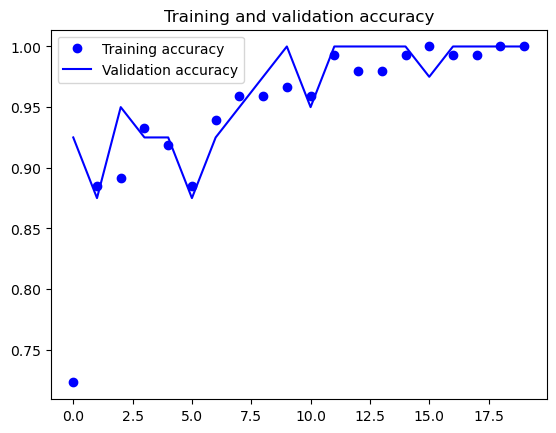

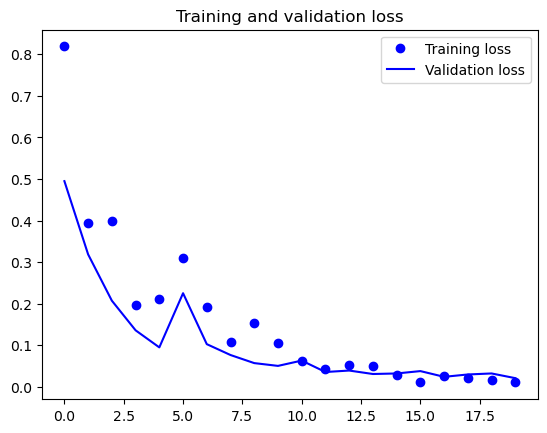

In [45]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [82]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve
predict_1 = np.argmax(predict, axis=1)
fpr, tpr, thresholds = roc_curve(real, predict_1)
from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)

Area under curve, AUC =  0.6


1/1 [==============================] - 2s 2s/step
prediction class:  [0]


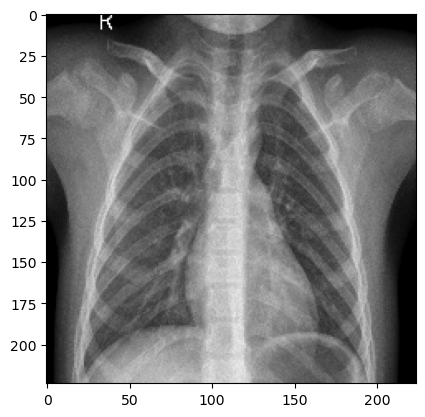

In [72]:
class_dict = {0:'Normal',
              1:'Pneumonia'}
import cv2
file_path =  'D:/tarbiat class/ANN/TA/TA/project/predict/2/IM-0030-0001.jpeg'
test_image = cv2.imread(file_path)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_CUBIC)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs , axis=1)


print('prediction class: ',pred_class)

AxesSubplot(0.1675,0.11;0.5775x0.77)
report :               precision    recall  f1-score   support

           0       0.60      0.60      0.60        20
           1       0.60      0.60      0.60        20

    accuracy                           0.60        40
   macro avg       0.60      0.60      0.60        40
weighted avg       0.60      0.60      0.60        40



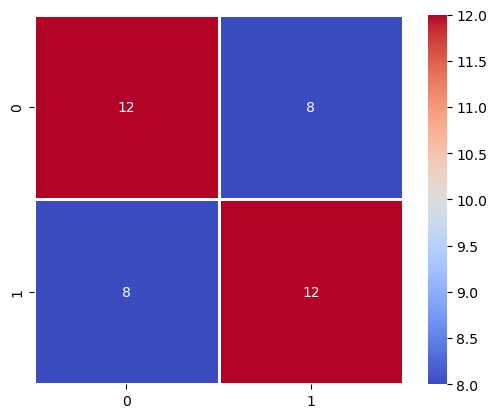

In [83]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve
predict_1 = np.argmax(predict, axis=1,out=None)
con = confusion_matrix(real,predict_1)
print(sns.heatmap(con,cmap="coolwarm" ,annot=True,fmt="d",linewidths=1 ,square= True))
print('report :',classification_report(real,predict_1))